# Задание 21 - Уравнение Кеплера
[Каханер–Моулер–Нэш] Уравнение Кеплера для вычисления орбиты имеет вид$$
M=E-\varepsilon\sin E,
$$где $M$ – средняя аномалия, $E$ – эксцентрическая аномалия, $\varepsilon$ – эксцентриситет орбиты. Пусть $M=24.851090$, $\varepsilon=0.1$.

1. Изобразите полученную орбиту.
2. С помощью функции scipy.optimize.brentq найдите $E$.
3. Вычислите $E$ с помощью формулы
$$
  E = M + 2\sum_{m=1}^{\infty} \frac{1}{m} J_m(m\varepsilon) \sin(mM),
$$
где $J_m(x)$ – функция Бесселя $1$-го рода порядка $m$.
4. Найдите $E$ по предыдущей формуле, используя равенство  
$$
  J_m(m\varepsilon) = \sum_{n=0}^{\infty} \frac{(-1)^n (m\varepsilon/2)^{2n+m}}{n!(m+n)!}.
$$
5. Проведите сравнение вычислительных затрат и точности результатов, полученных каждым из трех способов.


# Построение орбиты

Эллипс — это сплюснутая на величину $\sqrt{1-e^2}$ окружность. Здесь e — эксцентриситет. 
Направим ось x от Солнца (начала координат), которое находится в одном из фокусов эллипса, в сторону перигелия по линии апсид (прямой, соединяющей перицентр с апоцентром).
Абсцисса небесного тела в точке $P$ будет равна $x=acos(E)-ae$ ордината будет, соответственно, равна $y=a\sin(E)\sqrt{1-e^2}$, где a — большая полуось, а Е - эксцентрическая аномалия.
Таким образом, получаем
$x=r\cos(v)=a(\cos(E)-e)$ ; 
$y=r\sin(v)=a\sin(E)\sqrt{1-e^2}$

# Построение орбиты

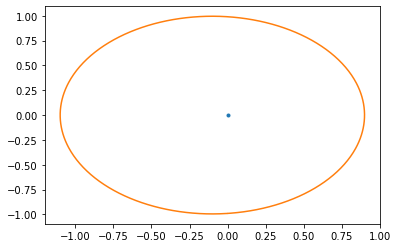

In [5]:
from numpy import*
from matplotlib.pyplot import*
from math import*
M=24.851090
e=0.1
a=1
N=720
E=[i for i in arange(0,N)]
x=array([a*(cos(E1)-e) for E1 in E])
y=array([a*sin(E1)*sqrt(1-e**2) for E1 in E])
angle = arctan2(x, y)
order = argsort(angle)
plot(0,0,'.')
plot(x[order], y[order])
pass

# Найдём E с помощью scipy.optimize.brentq:

In [99]:
from scipy import optimize, special
def f(E):
    return E-e*sin(E)-M
k=optimize.brentq(f,0,25)
print(k)

24.820357182542914


# Найдём E с помощью формулы
$$
 E = M + 2\sum_{m=1}^{\infty} \frac{1}{m} J_m(m\varepsilon) \sin(mM),
$$
           где $J_m(x)$ – функция Бесселя $1$-го рода порядка $m$.

In [100]:
E = list()
for i in range(1, 10):
    E.append(1/i*special.jv(i, e)*sin(i*M))
print(M + 2*sum(E))

24.822653088245808


# Найдём E с помощью предыдущей формулы и равенства:
 $$
 J_m(m\varepsilon) = \sum_{n=0}^{\infty} \frac{(-1)^n (m\varepsilon/2)^{2n+m}}{n!(m+n)!}.
 $$
    



In [101]:
E1 = list()
for i in range(1, 10):
    Bessel = sum([((-1)**j*((i*e)/2)**(2*j+i))/(factorial(j)*factorial(i+j)) for j in arange(10)])
    E1.append(1/i*Bessel*sin(i*M))
print(M + 2*sum(E1))

24.820357182559754


# Вывод
1. Результат 1го и 3го способа схожи, результат второго способа значительно отличается
2. Все три способа работают с примерно одинаковым быстродействием